# Регрессия, регуляризация, отбор признаков
## Елена Гоголева, Дейвид Капаца, Анастасия Мандрикова
### Практические примеры к докладу

In [47]:
library(MASS)
library(car)
library(Hmisc)
library(GGally)
library(glmnet)
library(psych)
library(leaps)
library(lm.beta)
library(caTools)
library(caret)
library(boot)
set.seed(33)

### Про данные

Измерения обхвата тела и диаметра скелета, а также возраста, веса, роста и пола приведены для 507 физически активных лиц - 247 мужчин и 260 женщин. Пропусков нет.



- bia_di - числовой вектор, биакромиальный диаметр респондента в сантиметрах.

- bii_di - числовой вектор, диаметр подвздошной кости респондента (ширина таза) в сантиметрах.

- bit_di - числовой вектор, битвертельный диаметр респондента в сантиметрах.

- che_de - числовой вектор, глубина груди респондента в сантиметрах, измеренная между позвоночником и грудиной на уровне сосков, середина выдоха.

- che_di - числовой вектор, диаметр груди респондента в сантиметрах, измеренный на уровне сосков, середина выдоха.

- elb_di - числовой вектор, диаметр локтя респондента в сантиметрах, измеренный как сумма двух локтей.

- wri_di - числовой вектор, диаметр запястья респондента в сантиметрах, измеренный как сумма двух запястий.

- Kne_di - числовой вектор, диаметр колена респондента в сантиметрах, измеренный как сумма двух колен.

- ank_di - числовой вектор, диаметр лодыжки респондента в сантиметрах, измеренный как сумма двух лодыжек.

- sho_gi - числовой вектор, обхват плеч респондента в сантиметрах, измеренный над дельтовидными мышцами.

- che_gi - числовой вектор, обхват груди респондента в сантиметрах, измеренный на линии соска у мужчин и чуть выше ткани груди у женщин, в середине выдоха.

- wai_gi - числовой вектор, обхват талии респондента в сантиметрах, измеренный в самой узкой части туловища ниже грудной клетки как среднее значение в сжатом и расслабленном положении.

- nav_gi - числовой вектор, обхват пупка (брюшной полости) респондента в сантиметрах, измеренный от пупка и гребня подвздошной кости с использованием гребня подвздошной кости в качестве ориентира.

- hip_gi - числовой вектор, обхват бедер респондента в сантиметрах, измеренный на уровне битвертельного диаметра.

- thi_gi - числовой вектор, обхват бедра респондента в сантиметрах, измеренный ниже ягодичной складки как среднее значение правого и левого обхватов.

- bic_gi - числовой вектор, обхват бицепса респондента в сантиметрах, измеренный при сгибании как среднее значение правого и левого обхватов.

- for_gi - числовой вектор, обхват предплечья респондента в сантиметрах, измеренный в вытянутом состоянии ладонью вверх как среднее значение правого и левого обхватов.

- Kne_gi - числовой вектор, диаметр колена респондента в сантиметрах, измеренный как сумма двух колен.

- cal_gi - числовой вектор, максимальный обхват икр респондента в сантиметрах, измеренный как среднее значение правого и левого обхватов.

- ank_gi - числовой вектор, минимальный обхват щиколотки респондента в сантиметрах, измеренный как среднее значение правого и левого обхватов.

- wri_gi - числовой вектор, минимальный обхват запястья респондента в сантиметрах, измеренный как среднее значение правого и левого обхватов.

- age - числовой вектор, возраст респондента в годах.

- wgt - числовой вектор, вес респондента в килограммах.

- hgt - числовой вектор, рост респондента в сантиметрах.

- sex - категориальный вектор, 1, если респондент мужчина, 0, если женщина.

Для начала посмотрим как выглядят данные.

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
6,43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,...,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


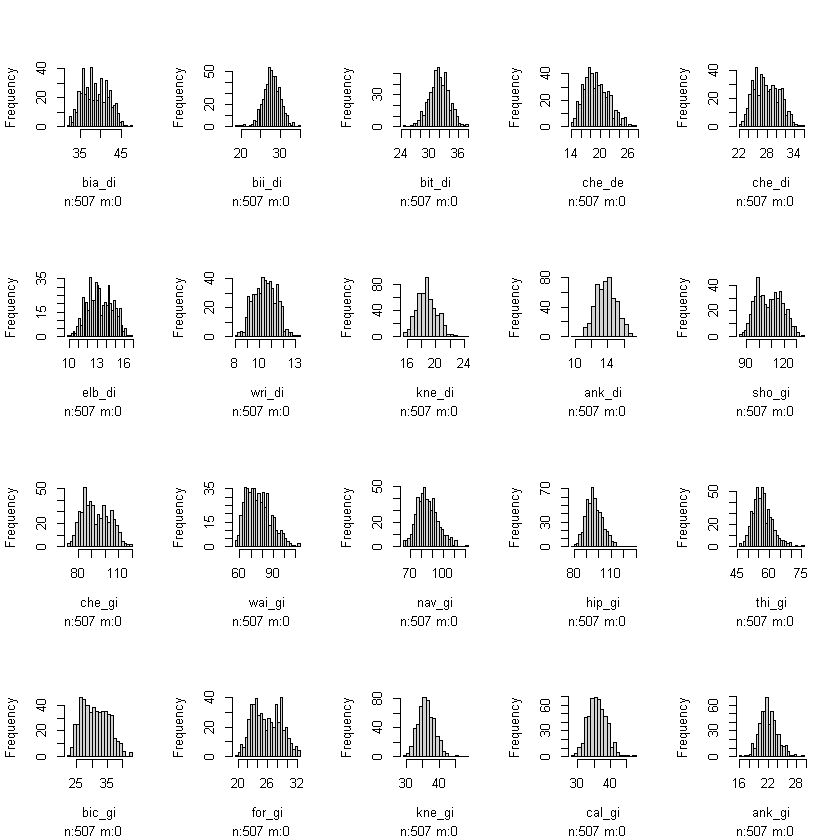

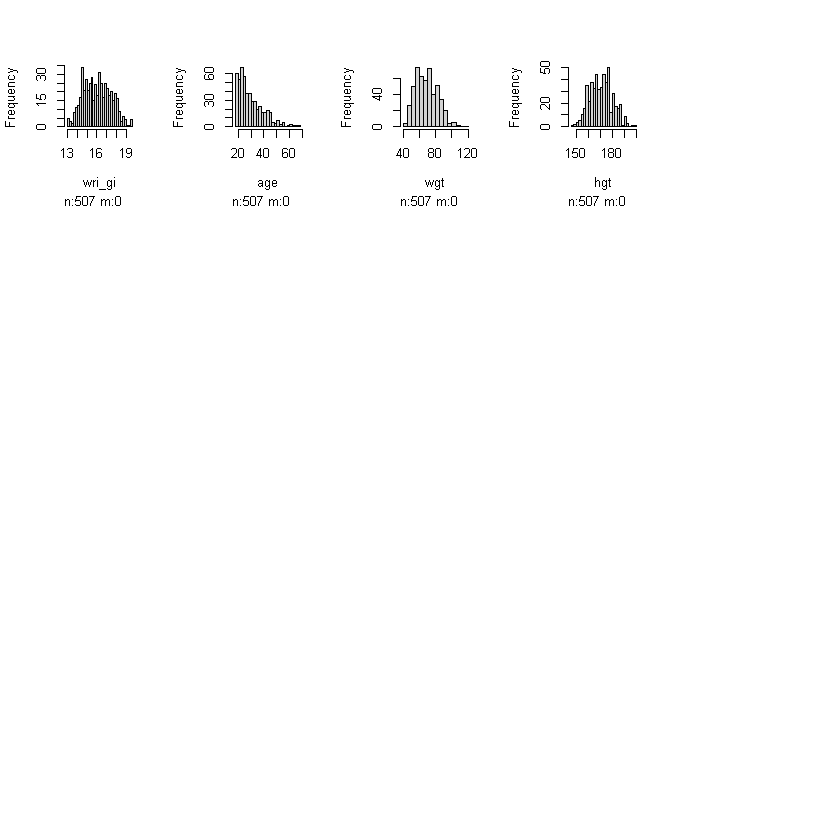

In [2]:
df <- read.csv(file = "bdims.csv")[-1]
head(df)
hist.data.frame(df) #гистограммы всех столбцов data.frame
                    #в python построить гистограмму можно с помощью matplotlib.pyplot.hist

Некоторые признаки очеивдно не обладают симметричностью, примем решение о трансформации на основе коэффициента асимметрии.

In [3]:
names(df)[skew(df) > 0.5]

# в python асимметрия вычисляется с помощью scipy.stats.skew

[1] "wai_gi" "thi_gi" "age"

Применим log к признакамx: обхват талии, обхват бедра, возраст.

In [4]:
ind <- skew(df) > 0.5
df[,ind] <- log(df[,ind])

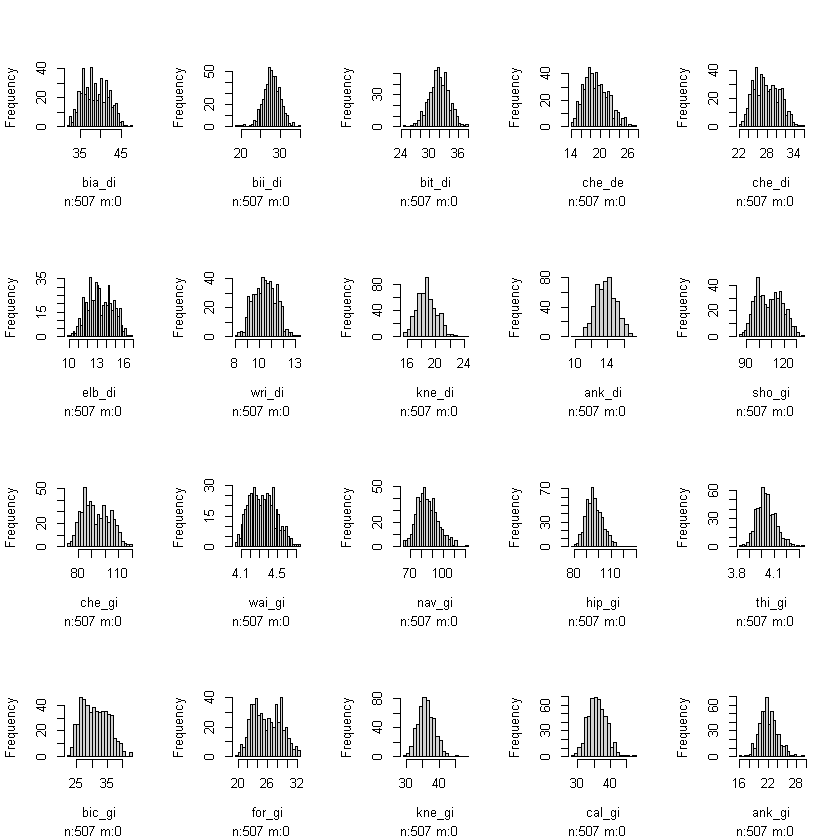

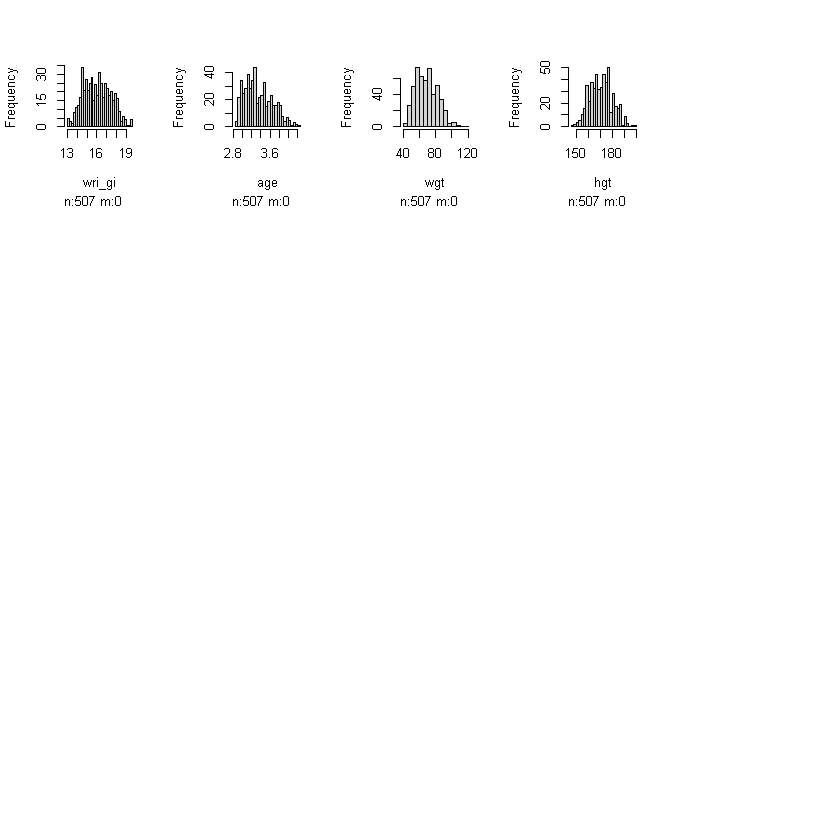

In [5]:
hist.data.frame(df) 

Ситуация с симметричностью стала лучше. Продолжим исследование данных

 bia_di  bii_di  bit_di  che_de  che_di  elb_di  wri_di  kne_di  ank_di  sho_gi 
 38.811  27.830  31.980  19.226  27.974  13.385  10.543  18.811  13.863 108.195 
 che_gi  wai_gi  nav_gi  hip_gi  thi_gi  bic_gi  for_gi  kne_gi  cal_gi  ank_gi 
 93.334   4.334  85.654  96.681   4.038  31.170  25.943  36.203  36.078  22.157 
 wri_gi     age     hgt 
 16.097   3.362 171.144 


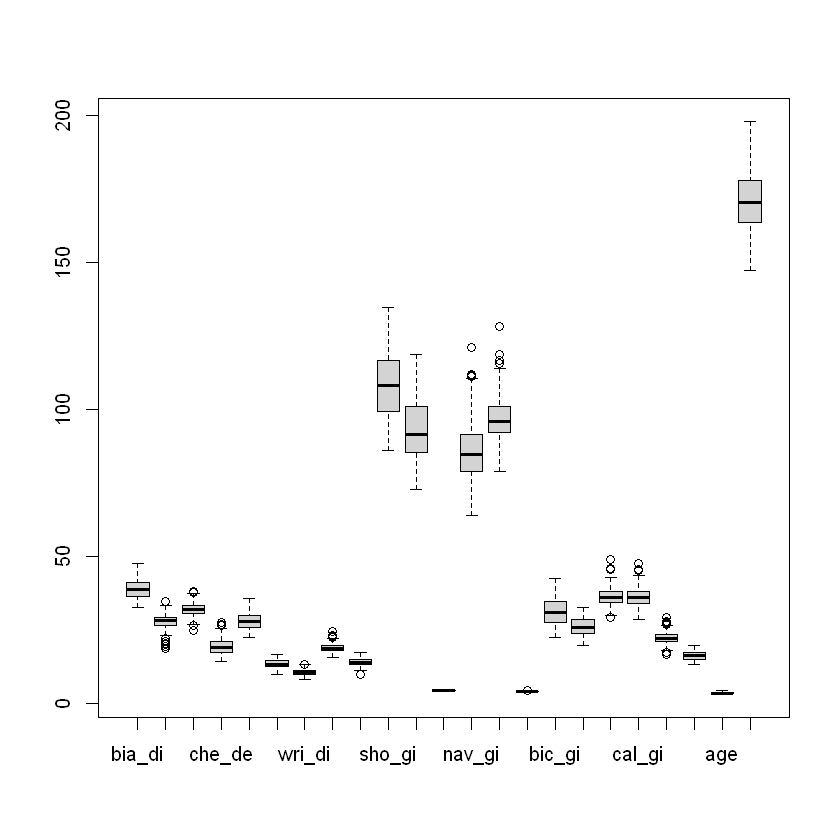

In [6]:
print(colMeans(df[,-c(23, 25)]), digits = 4)
boxplot(df[,-c(23, 25)])

# в python все векторизовано df.mean()

Из графика понятно, что диапазоны значений признаков отличаются. Это может сказаться на качестве предсказания и вкладе конкретных признаков в модель. Стоит использовать стандартизацию. (К весу, как целевой переменной, это преобразование не применяется.)

Для стандартизации в python используйте preprocessing.normalize() из sklearn

    bia_di     bii_di     bit_di     che_de     che_di     elb_di     wri_di 
-9.436e-16 -1.466e-16 -6.457e-16 -4.607e-16 -3.055e-16  2.443e-16 -4.187e-16 
    kne_di     ank_di     sho_gi     che_gi     wai_gi     nav_gi     hip_gi 
 6.842e-16 -1.317e-16 -2.310e-17 -3.431e-16  1.241e-16 -6.513e-16 -3.663e-16 
    thi_gi     bic_gi     for_gi     kne_gi     cal_gi     ank_gi     wri_gi 
-5.193e-15 -3.242e-16 -3.195e-16 -1.083e-15 -9.962e-16  5.972e-16  2.777e-16 
       age        hgt 
 4.406e-16  7.255e-16 


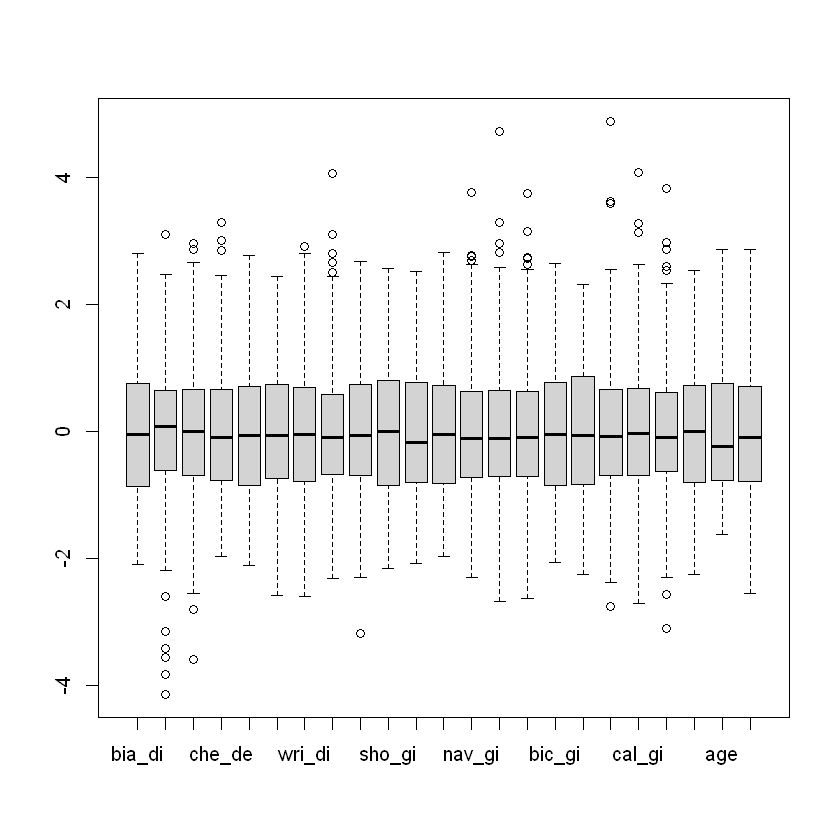

In [7]:
df[,-c(23, 25)] <- scale(df[,-c(23, 25)])
print(colMeans(df[,-c(23, 25)]), digits = 4)
boxplot(df[,-c(23, 25)])

Теперь диапазоны значений признаков похожи. Построим тепловую карту, чтобы понять есть ли связи между признаками. 

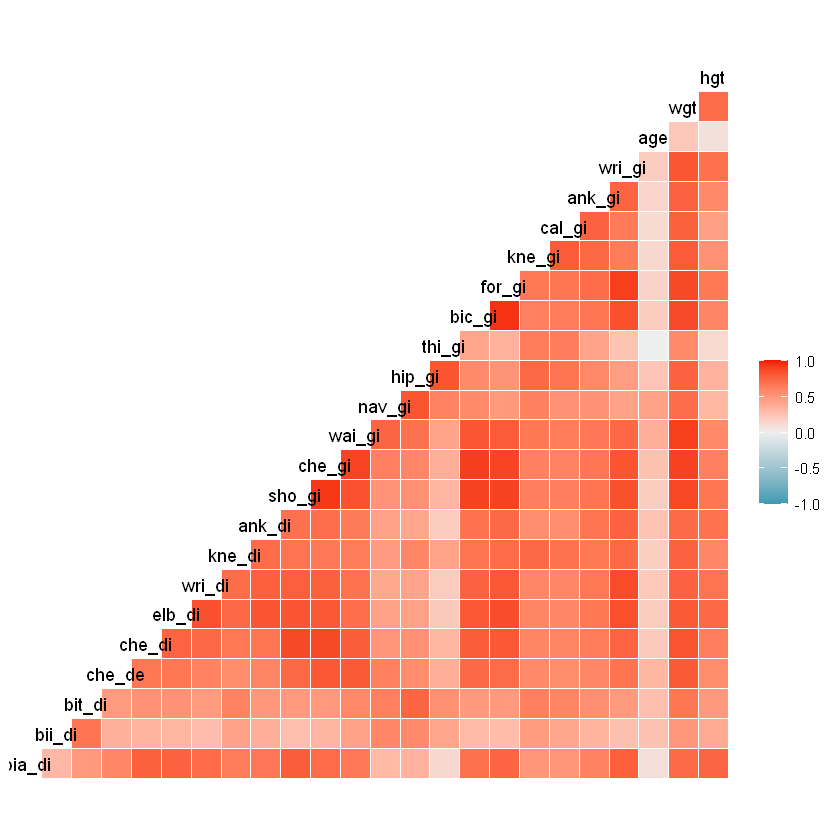

In [8]:
ggcorr(df[,-25])

Как и ожидалось параметры тела сильно коррелируют между собой, исключеним является только возраст. То есть имеет место проблема мультиколлинеарности.

тепловую карту в python можно пострить выполнив следующее  
import seaborn as sns  
import matplotlib.pyplot as plt  
sns.heatmap(df.corr(method='pearson'), cmap="coolwarm")  
plt.show()  

Разделим выборку на два набора: тренировочный и тестовый.

In [9]:
sample <- sample.split(df, SplitRatio = 0.80) 
train <- subset(df, sample == TRUE)
test <- subset(df, sample == FALSE)

#разделение на тренировочную и тестовую выборку в python можно организовать так
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle, test_size, random_state, ...)

eigenvalues <- svd(train[,-23])$d
print(c("Число обусловленности X_train = " = max(eigenvalues)/min(eigenvalues)), digits = 4)

Число обусловленности X_train =  
                           18.38 


# Многомерная линейная регрессия

In [10]:
full_model <- lm(wgt~., data = train)
summary(full_model)

#обучить линейную решрессию в python
#LinearRegression().fit(X_train, y_train)


Call:
lm(formula = wgt ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5880 -1.4362  0.0422  1.4315 10.1068 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 69.94688    0.34102 205.108  < 2e-16 ***
bia_di      -0.10799    0.24710  -0.437 0.662348    
bii_di       0.37555    0.17170   2.187 0.029336 *  
bit_di      -0.13816    0.22825  -0.605 0.545338    
che_de       0.76007    0.21048   3.611 0.000346 ***
che_di       0.53825    0.26170   2.057 0.040396 *  
elb_di       0.20741    0.30727   0.675 0.500078    
wri_di       0.25004    0.25660   0.974 0.330448    
kne_di       0.39111    0.22492   1.739 0.082860 .  
ank_di       0.24399    0.23803   1.025 0.305998    
sho_gi       0.73647    0.39053   1.886 0.060080 .  
che_gi       1.49296    0.47443   3.147 0.001780 ** 
wai_gi       3.72774    0.37698   9.888  < 2e-16 ***
nav_gi      -0.02855    0.29381  -0.097 0.922638    
hip_gi       1.64772    0.36966   4.457 1.09e-05 ***


### VIF

Результаты регрессии могут вызывать сомнения, если есть коррелирующие признаки. VIF (Variance inflation factor - фактор, увеличивающий дисперсию) выявлет мультиколлинеарность. На основе полученного значения можно принять решение об исключении признака (в этой части мы не будем исключать признаки, воспользуемся другими способами позже).

$\text{VIF}_{i} = \frac{1}{1-R^{2}_{i}}$

In [11]:
VIF <- vif(full_model)
summary(VIF)
print(VIF, digits = 3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.700   4.010   5.210   7.012   9.403  17.120 

bia_di bii_di bit_di che_de che_di elb_di wri_di kne_di ank_di sho_gi che_gi 
  4.62   2.35   3.91   3.41   5.33   7.40   5.09   4.04   4.45  11.71  17.12 
wai_gi nav_gi hip_gi thi_gi bic_gi for_gi kne_gi cal_gi ank_gi wri_gi    age 
 10.87   6.79  10.67   6.22  13.70  15.44   4.44   4.24   3.82   8.98   1.70 
   hgt    sex 
  3.32   8.65 


### Метрики точности модели регрессии

- R-квадрат ($R^2$), представляющий собой квадрат множественного коэффициента корреляции между наблюдаемыми значениями результатов и значениями, предсказанными моделью. Скорректированный (adjusted) $R^{2}$ используется для сравнения моделей с различным числом параметров. Чем выше adjusted $R^2$, тем лучше модель.

- Среднеквадратичная ошибка (RMSE), которая измеряет среднюю ошибку прогноза, сделанную моделью при прогнозировании результата для наблюдения. Чем ниже RMSE, тем лучше модель.

- Средняя абсолютная ошибка (MAE), альтернатива RMSE, которая менее чувствительна к выбросам. Она соответствует средней абсолютной разнице между наблюдаемыми и прогнозируемыми результатами. Чем ниже MAE, тем лучше модель.

In [12]:
print("TRAIN")
predictions <- full_model %>% predict(train)
print(data.frame( R2 = R2(predictions, train$wgt),
            RMSE = RMSE(predictions, train$wgt),
            MAE = MAE(predictions, train$wgt)), digits = 4)
print("TEST")
predictions <- full_model %>% predict(test)
print(data.frame( R2 = R2(predictions, test$wgt),
            RMSE = RMSE(predictions, test$wgt),
            MAE = MAE(predictions, test$wgt)), digits = 4)

[1] "TRAIN"
      R2  RMSE   MAE
1 0.9713 2.183 1.721
[1] "TEST"
      R2  RMSE   MAE
1 0.9802 2.118 1.549


График частичных остатков - это графический метод, который пытается показать взаимосвязь между данной независимой переменной и зависимой переменной, учитывая, что другие независимые переменные также присутствуют в модели.  
$$\text{Residuals} + \hat{\beta}_{i}X_{i}\; \text{vs}\; X_i$$

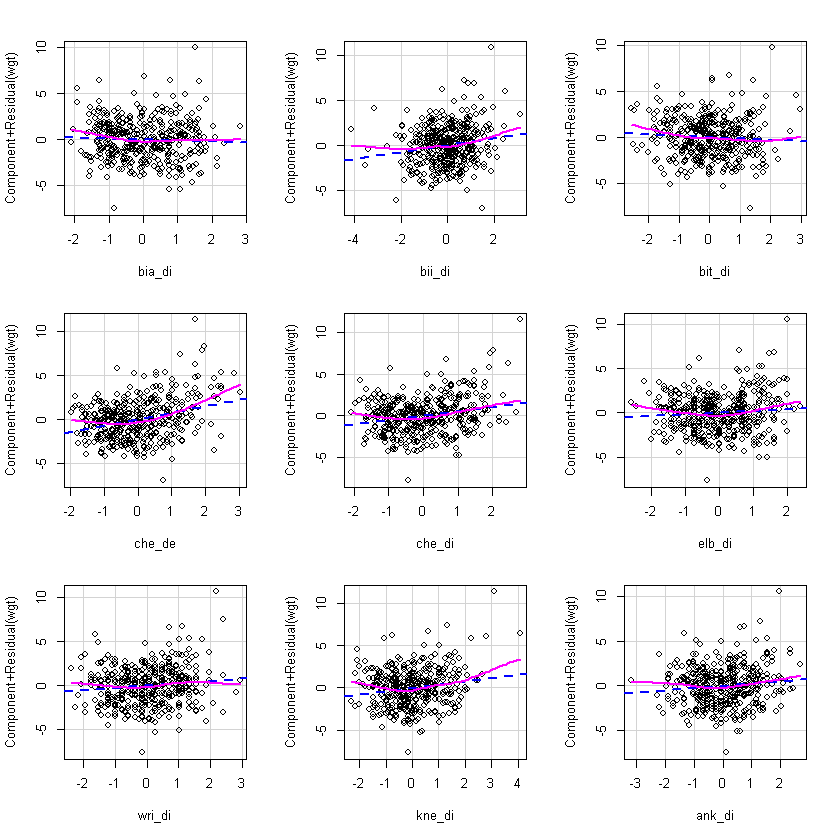

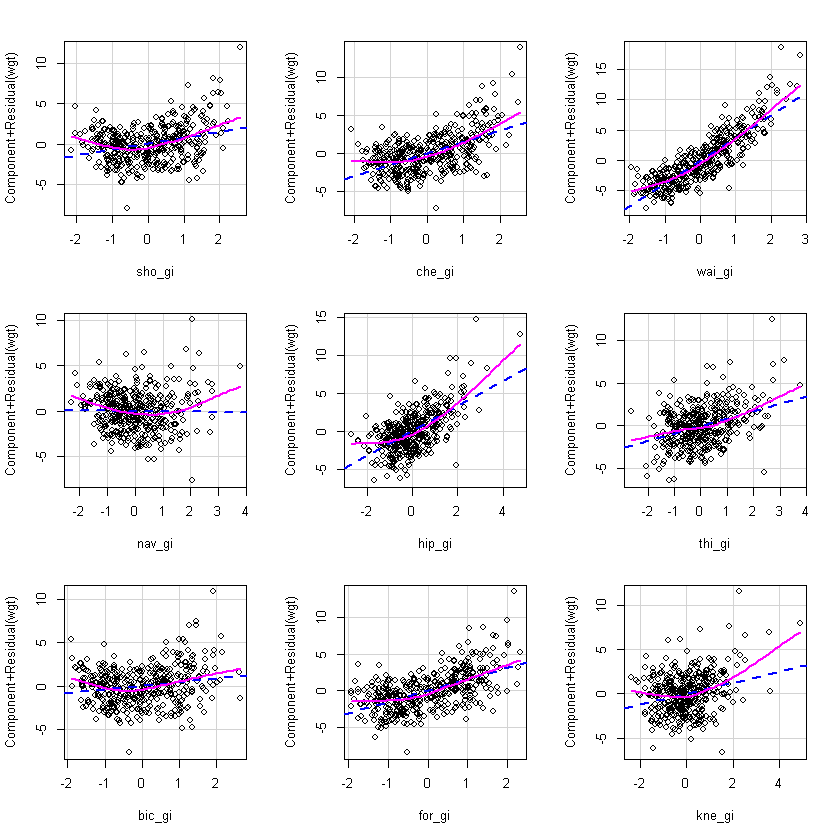

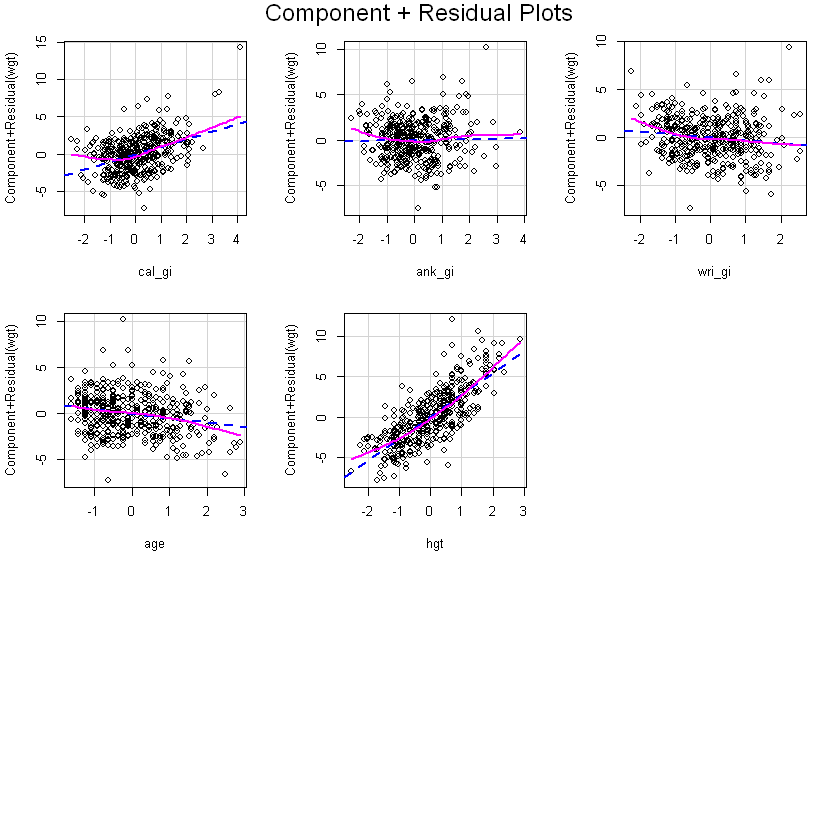

In [13]:
crPlots(full_model, terms = ~ . -sex)

Вспомним, что остатки должны быть распределены нормально, проведем анализ остатков.

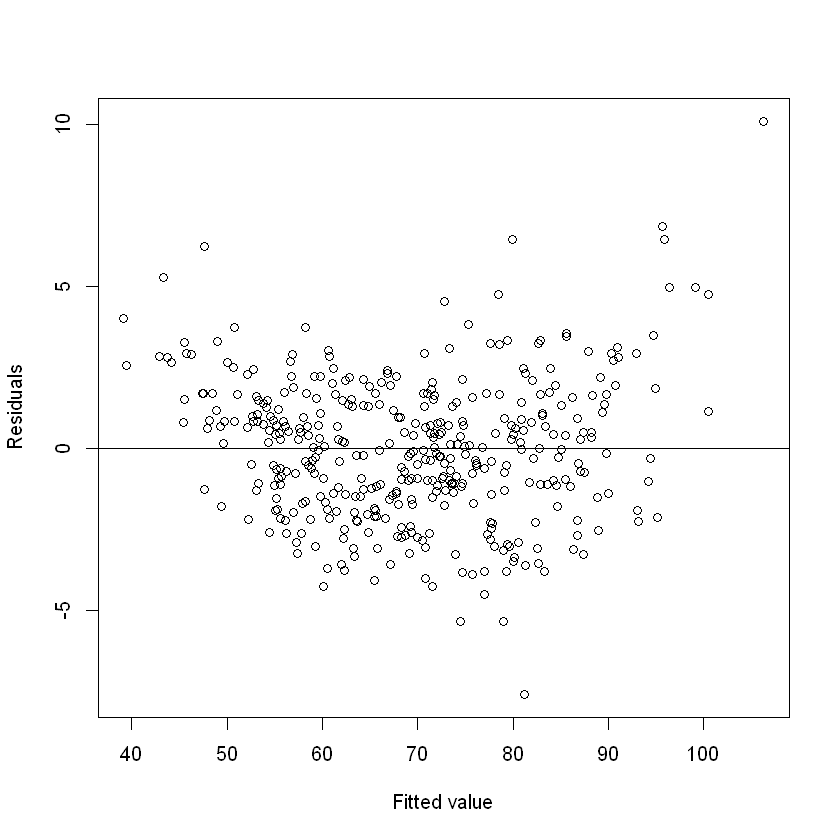

In [14]:
res <- resid(full_model)
plot(fitted(full_model), res, xlab = "Fitted value", ylab = "Residuals")
abline(0,0)

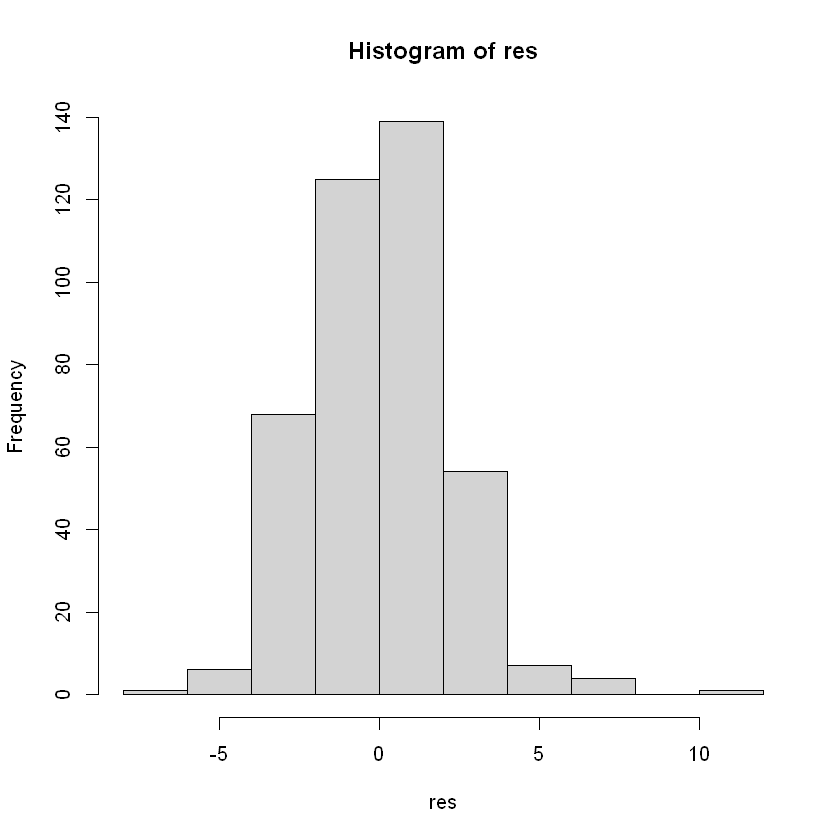

In [15]:
hist(res)

124 442 
100 354

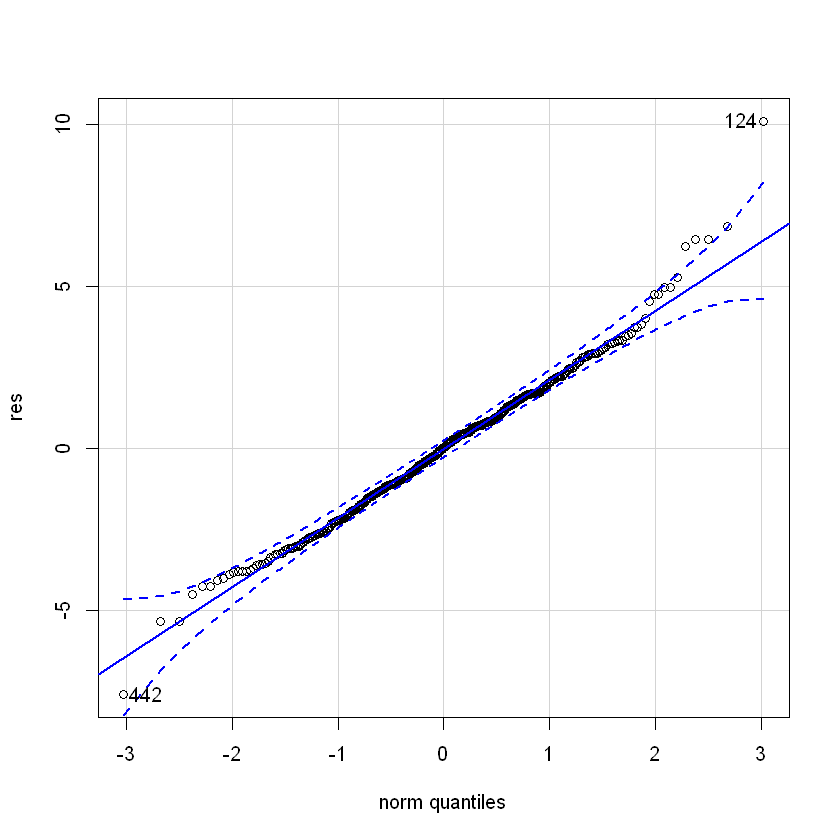

In [16]:
qqPlot(res, )

# в python scipy.stats.probplot(x, dist='norm', plot=pylab)

In [17]:
shapiro.test(res)

# в python scipy.stats.shapiro()


	Shapiro-Wilk normality test

data:  res
W = 0.98775, p-value = 0.001744


Гипотеза о нормальном распределении остатков отклоняется.

### Leave one out cross validation - LOOCV
Этот метод работает следующим образом:

1) Удаляется одна точка данных и строится модель на остальной части набора.
2) Тестируется модель на точке, которая не учитывается на шаге 1, и запоминается ошибка теста, связанная с прогнозом.
3) Процесс повторяется для всех точек данных.
4) Вычисляется общая ошибка предсказания, как среднее значение всех оценок ошибок теста, записанных на шаге 2.

Использование одной точки для оценки производительности модели на каждой итерации может привести к высокой вариации ошибки прогноза, если некоторые точки данных являются выбросами. 

### K-fold cross-validation
Все аналогично Leave one out cv, только на каждом шаге в качестве тестового множества используется часть исходного набора данных. На итерациях тестовые наборы не пересекаются. 

На практике обычно выполняется k-кратная перекрестная проверка с использованием k = 5 или k = 10, поскольку эти значения, как было показано эмпирически, дают оценки, которые не страдают ни чрезмерно большим смещением, ни очень высокой дисперсией.

## Ridge

Чтобы определить параметр регуляризации доставляющий минимум воспользуемся 5-фолдовой кросс-валидацией.

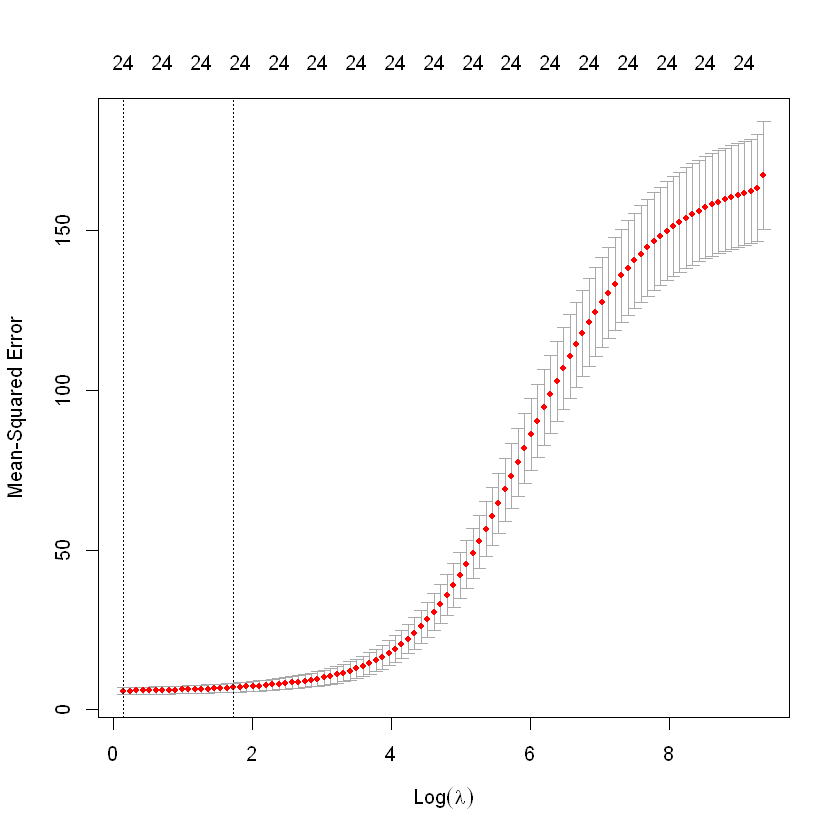

In [18]:
Y <- train$wgt
X <- model.matrix(data = train, wgt~.)[,-1]
X_test <- model.matrix(data = test, wgt~.)[,-1]
Y_test <- test$wgt
cv.ridge <- cv.glmnet(X, Y, alpha = 0, nfolds = 5)
plot(cv.ridge)

In [19]:
bestlam <- cv.ridge$lambda.min
print(bestlam, digits = 3)

[1] 1.16


In [20]:
ridge.mod <- glmnet(X, Y, alpha=0, lambda=bestlam, standardize=TRUE)
ridge.pred <- predict(ridge.mod, s=bestlam, newx=X_test)

In [21]:
print("TRAIN")
X <- model.matrix(data = train, wgt~.)[,-1]
X_test <- model.matrix(data = test, wgt~.)[,-1]

ridge.pred <- predict(ridge.mod, s=bestlam, newx=X)
print(data.frame( R2 = unname(R2(ridge.pred, train$wgt)),
            RMSE = RMSE(ridge.pred, train$wgt),
            MAE = MAE(ridge.pred, train$wgt)), digits = 4)
print("TEST")
ridge.pred <- predict(ridge.mod, s=bestlam, newx=X_test)
print(data.frame( R2 = unname(R2(ridge.pred, test$wgt)),
            RMSE = RMSE(ridge.pred, test$wgt),
            MAE = MAE(ridge.pred, test$wgt)), digits = 4)

[1] "TRAIN"
      R2  RMSE   MAE
1 0.9691 2.271 1.762
[1] "TEST"
      R2  RMSE   MAE
1 0.9777 2.242 1.576


In [22]:
round(predict(ridge.mod, type='coefficients', s=bestlam), digits = 3)
coef_ridge <- rownames(predict(ridge.mod, type='coefficients', s=bestlam))[-1]

25 x 1 sparse Matrix of class "dgCMatrix"
                 1
(Intercept) 69.066
bia_di       0.045
bii_di       0.430
bit_di       0.089
che_de       0.911
che_di       0.725
elb_di       0.238
wri_di       0.308
kne_di       0.344
ank_di       0.214
sho_gi       0.946
che_gi       1.252
wai_gi       2.272
nav_gi       0.655
hip_gi       1.384
thi_gi       1.048
bic_gi       0.648
for_gi       0.921
kne_gi       0.798
cal_gi       0.863
ank_gi       0.192
wri_gi       0.059
age         -0.429
hgt          2.016
sex          0.074

## Lasso

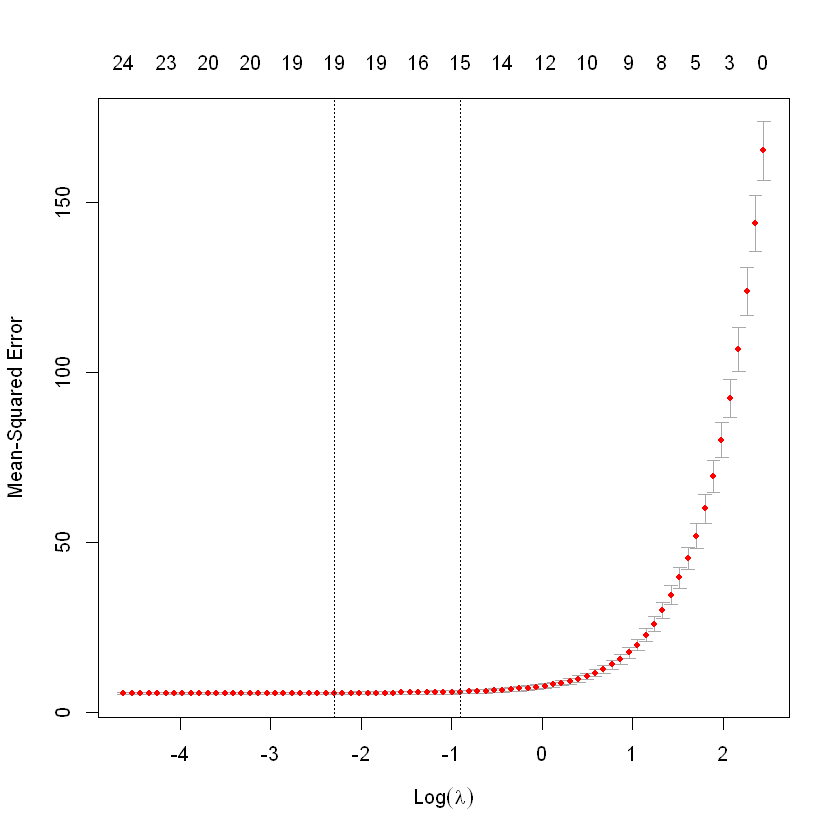

In [23]:
cv.lasso <- cv.glmnet(X, Y, alpha = 1, nfolds = 5)
plot(cv.lasso)

In [24]:
bestlam2 <- cv.lasso$lambda.min
print(bestlam2, digits = 3)

[1] 0.101


In [25]:
lasso.mod <- glmnet(X, Y, alpha=1, lambda=bestlam2, standardize=TRUE)
lasso.pred <- predict(lasso.mod, s=bestlam2, newx=X_test)

print("TRAIN")
lasso.pred <- predict(lasso.mod, s=bestlam, newx=X)
print(data.frame( R2 = unname(R2(lasso.pred, train$wgt)),
            RMSE = RMSE(lasso.pred, train$wgt),
            MAE = MAE(lasso.pred, train$wgt)), digits = 4)
print("TEST")
lasso.pred <- predict(lasso.mod, s=bestlam, newx=X_test)
print(data.frame( R2 = unname(R2(lasso.pred, test$wgt)),
            RMSE = RMSE(lasso.pred, test$wgt),
            MAE = MAE(lasso.pred, test$wgt)), digits = 4)

[1] "TRAIN"
      R2 RMSE   MAE
1 0.9705 2.22 1.729
[1] "TEST"
      R2  RMSE   MAE
1 0.9804 2.104 1.467


In [26]:
round(predict(lasso.mod, type='coefficients', s=bestlam2), digits = 3)
coef_lasso <- rownames(predict(lasso.mod, type='coefficients', s=bestlam2))[-c(1,
                                                                               which(predict(lasso.mod, type='coefficients', s=bestlam2) == 0))]

25 x 1 sparse Matrix of class "dgCMatrix"
                 1
(Intercept) 69.103
bia_di       .    
bii_di       0.294
bit_di       .    
che_de       0.641
che_di       0.479
elb_di       0.074
wri_di       0.127
kne_di       0.351
ank_di       0.103
sho_gi       0.616
che_gi       1.642
wai_gi       3.174
nav_gi       0.140
hip_gi       1.729
thi_gi       1.079
bic_gi       0.248
for_gi       1.306
kne_gi       0.688
cal_gi       0.995
ank_gi       .    
wri_gi       .    
age         -0.284
hgt          2.515
sex          .    

# Выбор параметров
### Best subset selection

Для упрощения модели с большим количеством переменных, можно использовать пошаговую регрессию для выбора важных переменных.

Функция regsubsets находится в пакете leaps. Можно указать метод с помощью method. nvmax - максимальное количество признаков, которое будет рассматриваться. 
Для наших данных выбираем максимально возможное количество признаков. В результате перечислены индексы моделей (1:24), также это число является количеством признаков в модели. Данный метод начинает с модели без признаков и выбирает какой признак добавить на каждом шаге, путем перибора, добавляя каждый признак. Выбирается тот признак, добавление которого улучшило показатель модели ($R^{2}$ - наибольший). Внизу приведены лучшие модели всех возможных размерностей модели. Значёк "*" означет что признак не был удален из модели.

In [27]:
df_best.s  <- regsubsets(wgt~., data = train, nvmax = 24, intercept=TRUE)
df_best.s_sum = summary(df_best.s )
df_best.s_sum

Subset selection object
Call: regsubsets.formula(wgt ~ ., data = train, nvmax = 24, intercept = TRUE)
24 Variables  (and intercept)
       Forced in Forced out
bia_di     FALSE      FALSE
bii_di     FALSE      FALSE
bit_di     FALSE      FALSE
che_de     FALSE      FALSE
che_di     FALSE      FALSE
elb_di     FALSE      FALSE
wri_di     FALSE      FALSE
kne_di     FALSE      FALSE
ank_di     FALSE      FALSE
sho_gi     FALSE      FALSE
che_gi     FALSE      FALSE
wai_gi     FALSE      FALSE
nav_gi     FALSE      FALSE
hip_gi     FALSE      FALSE
thi_gi     FALSE      FALSE
bic_gi     FALSE      FALSE
for_gi     FALSE      FALSE
kne_gi     FALSE      FALSE
cal_gi     FALSE      FALSE
ank_gi     FALSE      FALSE
wri_gi     FALSE      FALSE
age        FALSE      FALSE
hgt        FALSE      FALSE
sex        FALSE      FALSE
1 subsets of each size up to 24
Selection Algorithm: exhaustive
          bia_di bii_di bit_di che_de che_di elb_di wri_di kne_di ank_di sho_gi
1  ( 1 )  " "    " "    

Для выбора оптимальной модели посчитаем значения, BIC, скорректированный $R^{2}$ для оптимальной с точки зрения алгоритма модели каждого размера.

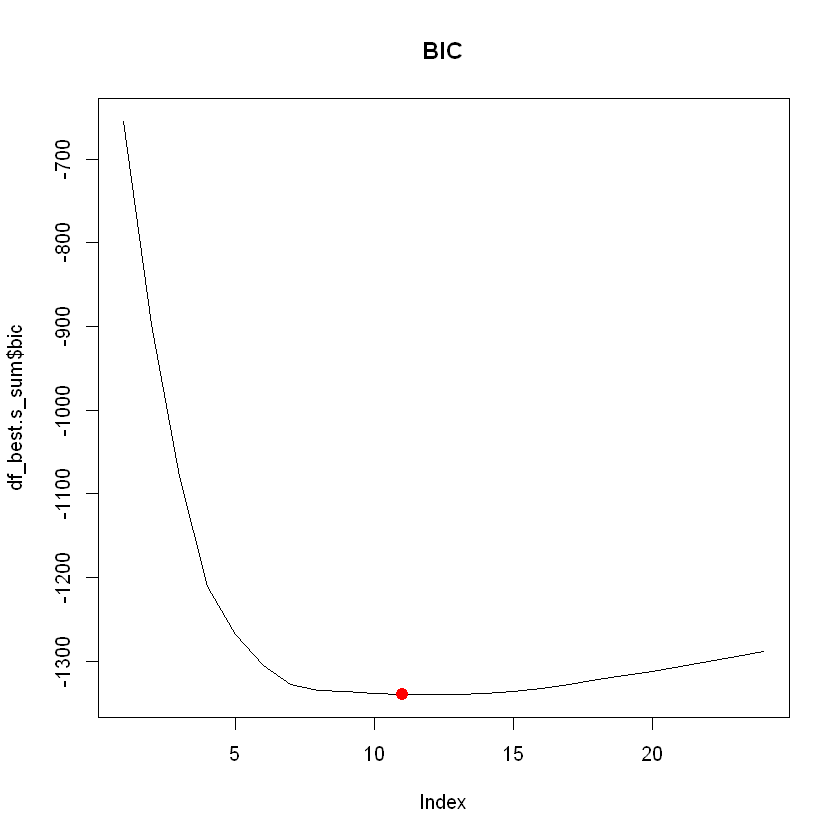

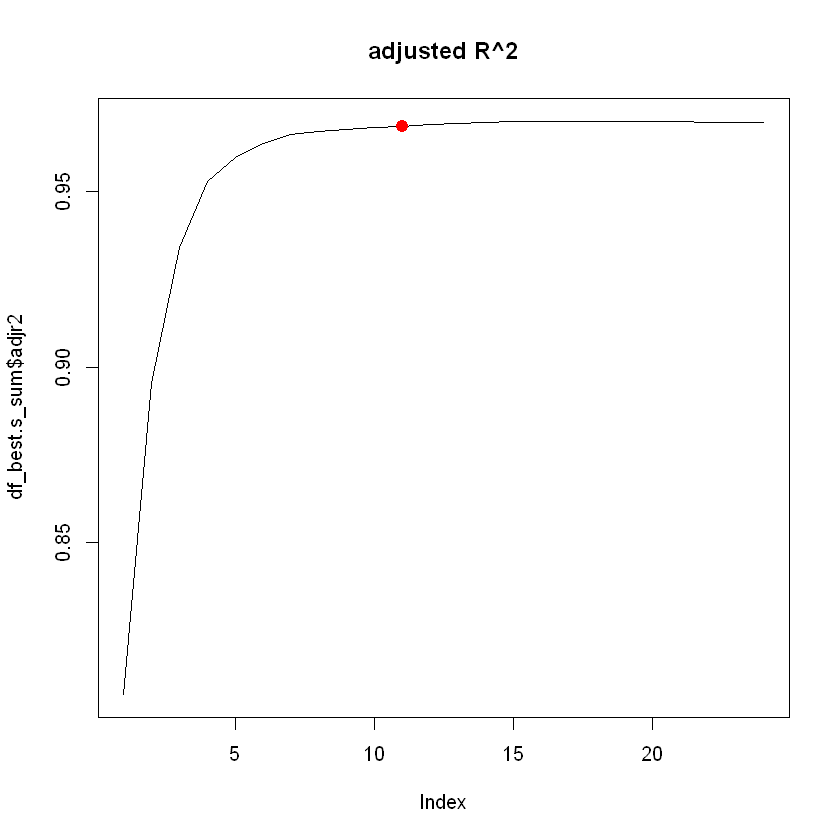

In [28]:
plot(df_best.s_sum$bic, type = "l", main = "BIC")
points(11,df_best.s_sum$bic[11], col="red",cex=2,pch=20)
plot(df_best.s_sum$adjr2, type = "l", main = "adjusted R^2")
points(11, df_best.s_sum$adjr2[11], col="red",cex=2,pch=20)

Используя индекс можно достать лучшую по мнению метода модель для конкретного числа признаков.

In [29]:
print(coef(df_best.s, 11), digits = 3)
coef_best_subset <- names(coef(df_best.s, 11))[-1]

(Intercept)      che_de      kne_di      che_gi      wai_gi      hip_gi 
     69.878       0.653       0.804       2.439       3.953       1.777 
     thi_gi      for_gi      cal_gi         age         hgt         sex 
      0.988       1.875       1.295      -0.482       3.093      -1.590 


In [30]:
coeffs <- df_best.s$xnames[df_best.s_sum$which[11,]] 
best.s_model <- lm(wgt ~ ., data = train[,c('wgt',coeffs[2:12])])
summary(best.s_model)


Call:
lm(formula = wgt ~ ., data = train[, c("wgt", coeffs[2:12])])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7685 -1.5850  0.0472  1.4276  9.9064 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.8775     0.3104 225.124  < 2e-16 ***
che_de        0.6526     0.2067   3.157 0.001716 ** 
kne_di        0.8041     0.1898   4.238 2.82e-05 ***
che_gi        2.4394     0.3510   6.950 1.53e-11 ***
wai_gi        3.9527     0.3383  11.685  < 2e-16 ***
hip_gi        1.7765     0.2993   5.936 6.43e-09 ***
thi_gi        0.9884     0.2552   3.874 0.000126 ***
for_gi        1.8754     0.3288   5.703 2.32e-08 ***
cal_gi        1.2946     0.2034   6.366 5.41e-10 ***
age          -0.4820     0.1394  -3.458 0.000604 ***
hgt           3.0929     0.1788  17.295  < 2e-16 ***
sex          -1.5900     0.5875  -2.706 0.007100 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.29 on 393 degrees of freedom
Multiple 

In [31]:
Y_train_best.s <- predict(best.s_model, train[,-23])
Y_test_best.s <- predict(best.s_model, test[,-23])

MSE_train_best.s <- sqrt(mean((Y_train_best.s - train$wgt)^2))
MSE_test_best.s <- sqrt(mean((Y_test_best.s - test$wgt)^2)) 
print(c("RMSE_train_best.s" = MSE_train_best.s, "RMSE_test_best.s" = MSE_test_best.s), digits = 4)

RMSE_train_best.s  RMSE_test_best.s 
            2.256             2.158 


Кросс-валидация

In [32]:
set.seed(10)
cost_f <- function(obs, pred) sqrt(mean((obs - pred)^2))
sel_data <- df[,c('wgt',coeffs[2:12])]
m_full <- glm(wgt ~ ., data = sel_data)
cv_best.s <- cv.glm(data = sel_data, m_full, cost = cost_f, K=10)

print(cv_best.s$delta, digits = 4)

[1] 2.289 2.286


### Forward stepwise selection 

In [33]:
df_fs <- regsubsets(wgt~., data = train, nvmax = 24, method = "forward", intercept=TRUE)
df_fs_sum <- summary(df_fs)
df_fs_sum

Subset selection object
Call: regsubsets.formula(wgt ~ ., data = train, nvmax = 24, method = "forward", 
    intercept = TRUE)
24 Variables  (and intercept)
       Forced in Forced out
bia_di     FALSE      FALSE
bii_di     FALSE      FALSE
bit_di     FALSE      FALSE
che_de     FALSE      FALSE
che_di     FALSE      FALSE
elb_di     FALSE      FALSE
wri_di     FALSE      FALSE
kne_di     FALSE      FALSE
ank_di     FALSE      FALSE
sho_gi     FALSE      FALSE
che_gi     FALSE      FALSE
wai_gi     FALSE      FALSE
nav_gi     FALSE      FALSE
hip_gi     FALSE      FALSE
thi_gi     FALSE      FALSE
bic_gi     FALSE      FALSE
for_gi     FALSE      FALSE
kne_gi     FALSE      FALSE
cal_gi     FALSE      FALSE
ank_gi     FALSE      FALSE
wri_gi     FALSE      FALSE
age        FALSE      FALSE
hgt        FALSE      FALSE
sex        FALSE      FALSE
1 subsets of each size up to 24
Selection Algorithm: forward
          bia_di bii_di bit_di che_de che_di elb_di wri_di kne_di ank_di sho_gi
1 

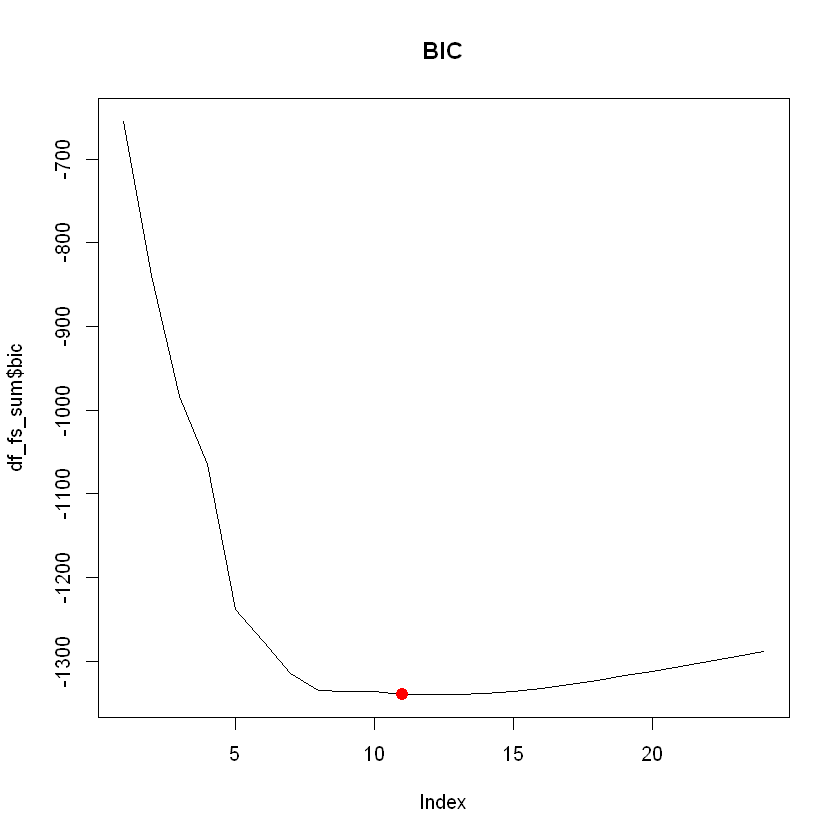

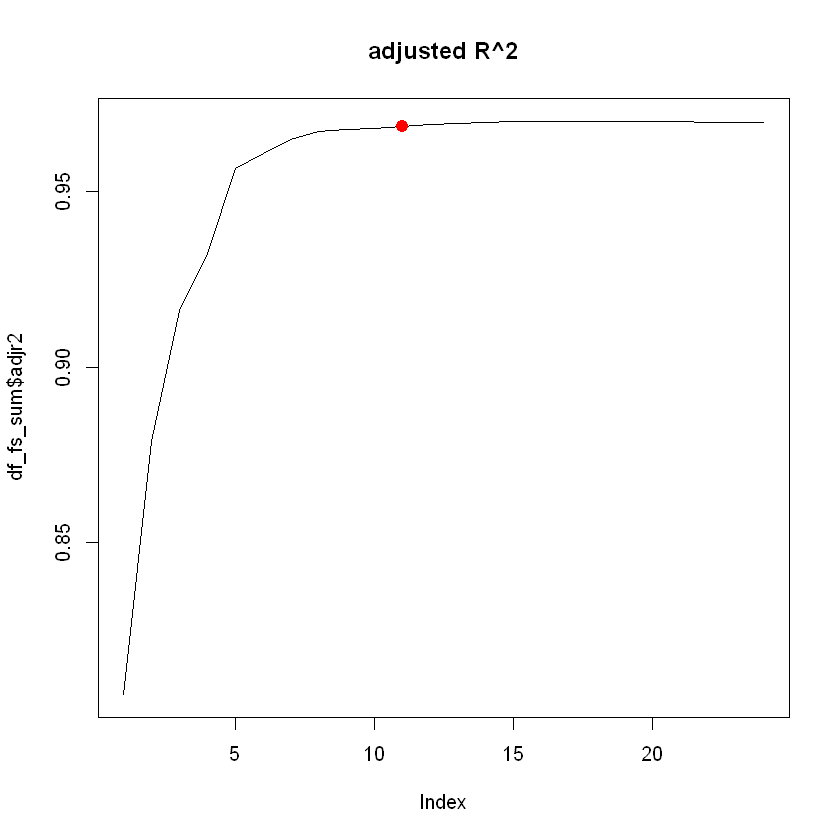

In [34]:
plot(df_fs_sum$bic, type = "l", main = "BIC")
points(11,df_fs_sum$bic[11], col="red",cex=2,pch=20)
plot(df_fs_sum$adjr2, type = "l", main = "adjusted R^2")
points(11,df_fs_sum$adjr2[11], col="red",cex=2,pch=20)

In [35]:
print(coef(df_fs, 11), digits = 3)
coef_forward <- names(coef(df_fs, 11))[-1]

(Intercept)      che_de      kne_di      che_gi      wai_gi      hip_gi 
     69.102       0.619       0.627       2.509       3.493       1.913 
     thi_gi      for_gi      kne_gi      cal_gi         age         hgt 
      1.099       1.474       0.606       1.096      -0.412       2.840 


In [36]:
coeffs <- df_fs$xnames[df_fs_sum$which[11,]] 
fs_model <- lm(wgt ~ ., data = train[,c('wgt',coeffs[2:12])])
summary(fs_model )


Call:
lm(formula = wgt ~ ., data = train[, c("wgt", coeffs[2:12])])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0707 -1.5223 -0.0194  1.3559 10.3860 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.1021     0.1141 605.434  < 2e-16 ***
che_de        0.6187     0.2066   2.995  0.00292 ** 
kne_di        0.6266     0.1953   3.208  0.00145 ** 
che_gi        2.5086     0.3534   7.098 5.94e-12 ***
wai_gi        3.4928     0.3123  11.186  < 2e-16 ***
hip_gi        1.9133     0.2874   6.658 9.37e-11 ***
thi_gi        1.0990     0.2480   4.432 1.21e-05 ***
for_gi        1.4743     0.3052   4.831 1.95e-06 ***
kne_gi        0.6058     0.2302   2.632  0.00883 ** 
cal_gi        1.0957     0.2168   5.054 6.64e-07 ***
age          -0.4120     0.1385  -2.974  0.00312 ** 
hgt           2.8401     0.1704  16.670  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.291 on 393 degrees of freedom
Multiple

In [37]:
Y_train_fs <- predict(fs_model, train[,-23])
Y_test_fs <- predict(fs_model, test[,-23])

MSE_train_fs <- sqrt(mean((Y_train_fs - train$wgt)^2))
MSE_test_fs <- sqrt(mean((Y_test_fs - test$wgt)^2)) 
print(c("RMSE_train_fs" = MSE_train_fs, "RMSE_test_fs" = MSE_test_fs), digits = 4)

RMSE_train_fs  RMSE_test_fs 
        2.257         2.103 


In [38]:
set.seed(10)
cost_f <- function(obs, pred) sqrt(mean((obs - pred)^2))
sel_data <- df[,c('wgt',coeffs[2:12])]
m_full <- glm(wgt ~ ., data = sel_data)
cv_best.s <- cv.glm(data = sel_data, m_full, cost = cost_f, K=10)

print(cv_best.s$delta, digits = 4)

[1] 2.287 2.283


### Backward stepwise selection

In [39]:
df_bs <- regsubsets(wgt~., data = train, intercept = TRUE, nvmax = 24, method = "backward")
df_bs_sum<- summary(df_bs)
df_bs_sum

Subset selection object
Call: regsubsets.formula(wgt ~ ., data = train, intercept = TRUE, nvmax = 24, 
    method = "backward")
24 Variables  (and intercept)
       Forced in Forced out
bia_di     FALSE      FALSE
bii_di     FALSE      FALSE
bit_di     FALSE      FALSE
che_de     FALSE      FALSE
che_di     FALSE      FALSE
elb_di     FALSE      FALSE
wri_di     FALSE      FALSE
kne_di     FALSE      FALSE
ank_di     FALSE      FALSE
sho_gi     FALSE      FALSE
che_gi     FALSE      FALSE
wai_gi     FALSE      FALSE
nav_gi     FALSE      FALSE
hip_gi     FALSE      FALSE
thi_gi     FALSE      FALSE
bic_gi     FALSE      FALSE
for_gi     FALSE      FALSE
kne_gi     FALSE      FALSE
cal_gi     FALSE      FALSE
ank_gi     FALSE      FALSE
wri_gi     FALSE      FALSE
age        FALSE      FALSE
hgt        FALSE      FALSE
sex        FALSE      FALSE
1 subsets of each size up to 24
Selection Algorithm: backward
          bia_di bii_di bit_di che_de che_di elb_di wri_di kne_di ank_di sho_gi


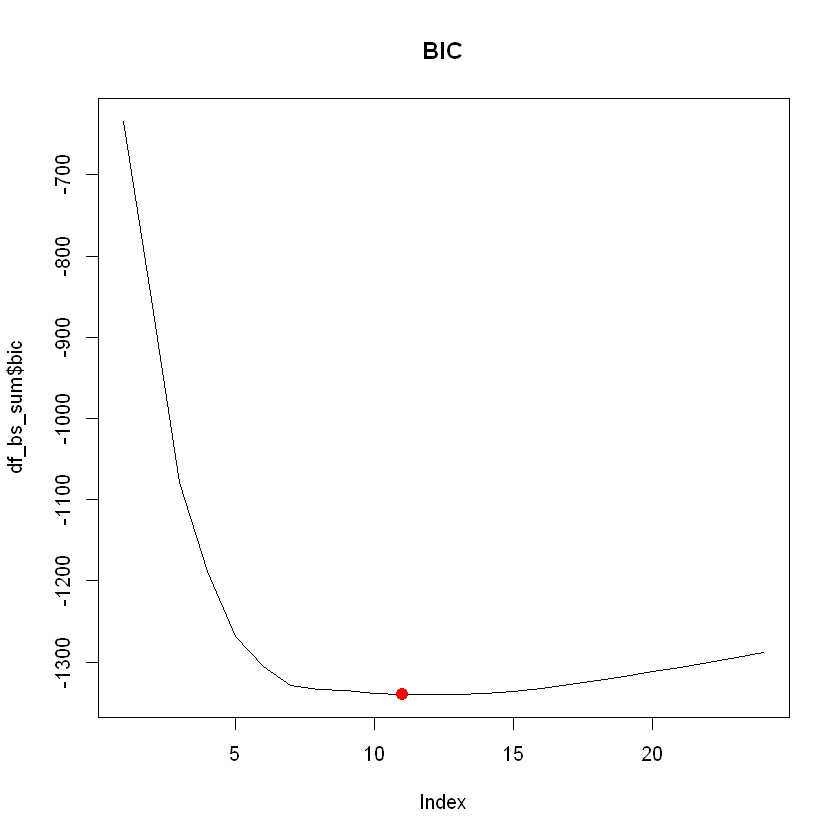

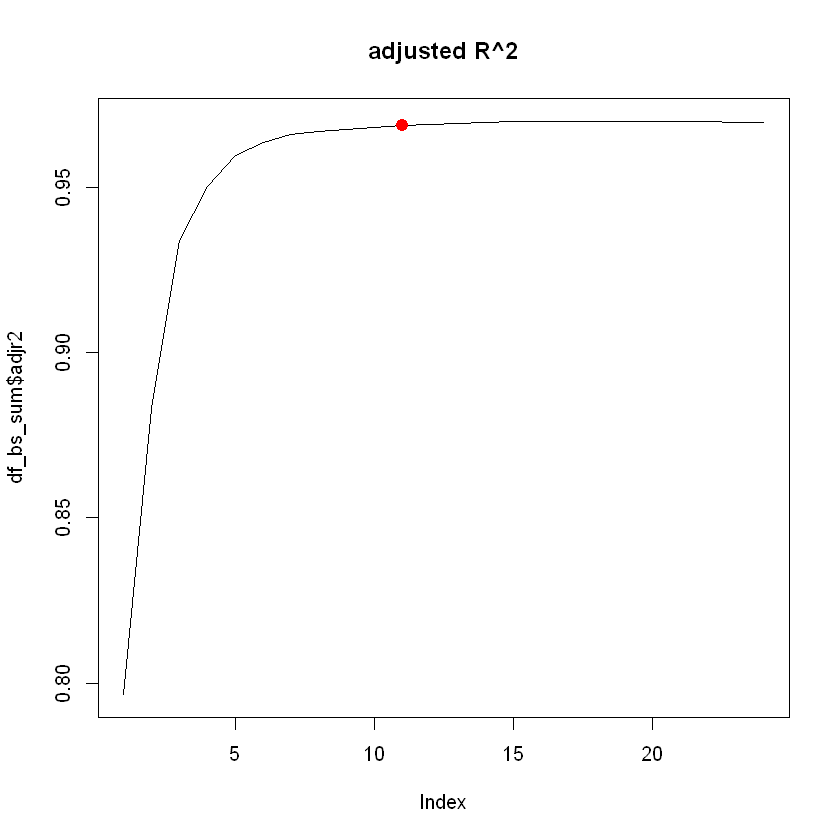

In [40]:
plot(df_bs_sum$bic, type = "l", main = "BIC")
points(11,df_bs_sum$bic[11], col="red",cex=2,pch=20)
plot(df_bs_sum$adjr2, type = "l", main = "adjusted R^2")
points(11,df_bs_sum$adjr2[11], col="red",cex=2,pch=20)

In [41]:
print(coef(df_bs, 11), digits = 3)
coef_backward <- names(coef(df_bs, 11))[-1]

(Intercept)      che_de      kne_di      che_gi      wai_gi      hip_gi 
     69.878       0.653       0.804       2.439       3.953       1.777 
     thi_gi      for_gi      cal_gi         age         hgt         sex 
      0.988       1.875       1.295      -0.482       3.093      -1.590 


In [42]:
coeffs <- df_bs$xnames[df_bs_sum$which[11,]] 
bs_model <- lm(wgt ~ ., data = train[,c('wgt',coeffs[2:12])])
summary(bs_model )


Call:
lm(formula = wgt ~ ., data = train[, c("wgt", coeffs[2:12])])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7685 -1.5850  0.0472  1.4276  9.9064 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.8775     0.3104 225.124  < 2e-16 ***
che_de        0.6526     0.2067   3.157 0.001716 ** 
kne_di        0.8041     0.1898   4.238 2.82e-05 ***
che_gi        2.4394     0.3510   6.950 1.53e-11 ***
wai_gi        3.9527     0.3383  11.685  < 2e-16 ***
hip_gi        1.7765     0.2993   5.936 6.43e-09 ***
thi_gi        0.9884     0.2552   3.874 0.000126 ***
for_gi        1.8754     0.3288   5.703 2.32e-08 ***
cal_gi        1.2946     0.2034   6.366 5.41e-10 ***
age          -0.4820     0.1394  -3.458 0.000604 ***
hgt           3.0929     0.1788  17.295  < 2e-16 ***
sex          -1.5900     0.5875  -2.706 0.007100 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.29 on 393 degrees of freedom
Multiple 

In [43]:
Y_train_bs <- predict(bs_model, train[,-23])
Y_test_bs <- predict(bs_model, test[,-23])

MSE_train_bs <- sqrt(mean((Y_train_bs - train$wgt)^2))
MSE_test_bs <- sqrt(mean((Y_test_bs - test$wgt)^2)) 
print(c("RMSE_train_bs" = MSE_train_bs, "RMSE_test_bs" = MSE_test_bs), digits = 4)

RMSE_train_bs  RMSE_test_bs 
        2.256         2.158 


In [44]:
set.seed(10)
cost_f <- function(obs, pred) sqrt(mean((obs - pred)^2))
sel_data <- df[,c('wgt',coeffs[2:12])]
m_full <- glm(wgt ~ ., data = sel_data)
cv_best.s <- cv.glm(data = sel_data, m_full, cost = cost_f, K=10)

print(cv_best.s$delta, digits = 4)

[1] 2.289 2.286


### Сравнение моделей по значениям RMSE

|RMSE/ Model           |     Train     |     Test    |
| :--------------------: |:-------------:| :----------:|
|Full model              |     $2.183$   |     $2.118$ |
|Ridge                   |     $2.271$   |     $2.242$ |
|Lasso                   |     $2.220$   |     $2.104$ |

|  Model                 |  RMSE (CV)    |
| :--------------------: |:-------------:|
|Best subset selection   |     $2.289$   |
|Forward selection       |     $2.287$   |
|Backward selection      |     $2.289$   |

Минимльная ошибка на тестовом множестве достигается при использовании Lasso. Оценки RMSE выше при использовании кросс-валидации.

Выбранные признаки в каждой модели и их колличество.

In [45]:
subset_coef <- list("Ridge" = coef_ridge, "Lasso" = coef_lasso, "Best_subset" = coef_best_subset, 
                    "Forward" = coef_forward, "Backward" = coef_backward)
subset_coef

$Ridge
 [1] "bia_di" "bii_di" "bit_di" "che_de" "che_di" "elb_di" "wri_di" "kne_di"
 [9] "ank_di" "sho_gi" "che_gi" "wai_gi" "nav_gi" "hip_gi" "thi_gi" "bic_gi"
[17] "for_gi" "kne_gi" "cal_gi" "ank_gi" "wri_gi" "age"    "hgt"    "sex"   

$Lasso
 [1] "bii_di" "che_de" "che_di" "elb_di" "wri_di" "kne_di" "ank_di" "sho_gi"
 [9] "che_gi" "wai_gi" "nav_gi" "hip_gi" "thi_gi" "bic_gi" "for_gi" "kne_gi"
[17] "cal_gi" "age"    "hgt"   

$Best_subset
 [1] "che_de" "kne_di" "che_gi" "wai_gi" "hip_gi" "thi_gi" "for_gi" "cal_gi"
 [9] "age"    "hgt"    "sex"   

$Forward
 [1] "che_de" "kne_di" "che_gi" "wai_gi" "hip_gi" "thi_gi" "for_gi" "kne_gi"
 [9] "cal_gi" "age"    "hgt"   

$Backward
 [1] "che_de" "kne_di" "che_gi" "wai_gi" "hip_gi" "thi_gi" "for_gi" "cal_gi"
 [9] "age"    "hgt"    "sex"

In [46]:
sapply(subset_coef, length)

Ridge       Lasso Best_subset     Forward    Backward 
         24          19          11          11          11